In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
# Data
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [5]:
# Model
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [6]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [7]:
# Prediction
y_pred = rf_model.predict(X_test)

In [8]:
np.sqrt(mean_squared_error(y_test, y_pred))

373.04044281427

In [10]:
# Model Tuning
rf_params = {"max_depth": [5,8,10],
             "max_features": [2,5,10],
             "n_estimators": [200, 500, 1000,2000],
             "min_samples_split": [2,10,80,100]}

In [11]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 14.9min finished


In [12]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [18]:
rf_tuned = RandomForestRegressor(random_state = 42,
                                       max_depth = 8,
                                       max_features = 2,
                                       min_samples_split = 2,
                                       n_estimators = 200)

In [19]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [20]:
y_pred = rf_tuned.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.2372919119422

### Variable Importance Level

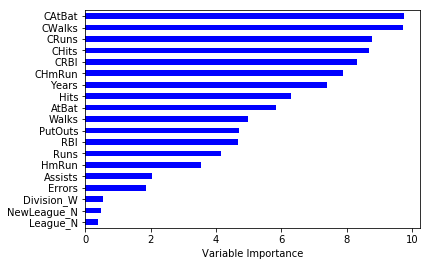

In [25]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_ * 100},
                            index = X_train.columns)


Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'b')

plt.xlabel('Variable Importance')
plt.gca().legend_ = None 